<a href="https://colab.research.google.com/github/sumitjg10/Electricity-Billing-System/blob/main/Customer%20Churn%20Prediction%20Using%20Machine%20Learning%20%E2%80%93%20Final%20Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Customer_Churn_Data_Large (1).xlsx to Customer_Churn_Data_Large (1).xlsx


In [2]:
!pip install imbalanced-learn openpyxl


📊 Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       160
           1       0.72      0.79      0.75       159

    accuracy                           0.74       319
   macro avg       0.74      0.74      0.74       319
weighted avg       0.74      0.74      0.74       319



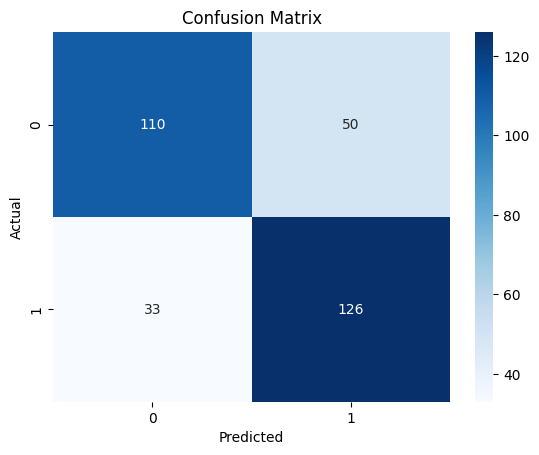

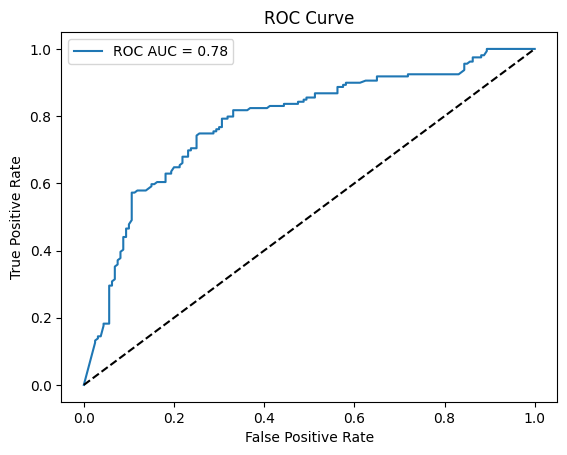

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load Excel sheets
file = "Customer_Churn_Data_Large (1).xlsx"
demographics = pd.read_excel(file, sheet_name="Customer_Demographics")
churn = pd.read_excel(file, sheet_name="Churn_Status")

# Merge on CustomerID
df = pd.merge(demographics, churn, on="CustomerID")

# Drop CustomerID (not a feature)
df.drop("CustomerID", axis=1, inplace=True)

# Encode categorical columns
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features (X) and target (y)
X = df.drop("ChurnStatus", axis=1)
y = df["ChurnStatus"]

# Balance the dataset using SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Print evaluation metrics
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot ROC curve
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
